# UC2 REST Tutorial

Here we are going to teach you how to interact with the UC2 microcontroller and how you can add additional functionalities. 

In order to use the client in your python environment you need the following packages to be installed:

(use the `!` to install it from within this jupyter notebook)
```py
!pip install numpy requests python-opencv
!pip install socket tempfile pyserial
```


This code has been tested with the ESP32 WEMOS D1 R32 + CNC shield v3, where 3 stepper are connected to the board and an LED Matrix (WS2812, adafruit) is connected to the FEED pin. 

The release file for the firmware can be found here: https://github.com/openUC2/UC2-REST/releases/tag/ESP32_WEMOS_D1_R32




## Organize all imports

First of all we need to import the `ESP32Client`. Since it is not yet a standalone pip package, we have to do that via a relaitve import, meaning that the file is in the same folder as this Jupyter Notebook

In [1]:
%load_ext autoreload 
%autoreload 2
from ESP32Client import ESP32Client  

# Connecting to the ESP32 via USB

Now we want to initiliaze the USB-serial connection. Therefore, connect the ESP32 to your computer using a data (!) USB cable and establish the connection. You can leave the port as "unknown" as the portfinder may identify the ESP.

**Important:** Close all applications that may be connected to the ESP (e.g. Arduino Serial Plotter)

**IMPORTANT:** Install the USB serial driver for the ESP32: https://learn.sparkfun.com/tutorials/how-to-install-ch340-drivers/all

In [2]:
ESP32 = ESP32Client(serialport="unknown")

2022-05-20 16:01:11 DEBUG [ESP32Client] Searching for SERIAL devices...
2022-05-20 16:01:11 DEBUG [ESP32Client] /dev/cu.MALS
2022-05-20 16:01:11 DEBUG [ESP32Client] /dev/cu.SOC
2022-05-20 16:01:11 DEBUG [ESP32Client] /dev/cu.Bluetooth-Incoming-Port
2022-05-20 16:01:11 DEBUG [ESP32Client] /dev/cu.MiTrueWirelessEBsBasic2
2022-05-20 16:01:11 DEBUG [ESP32Client] /dev/cu.SLAB_USBtoUART
2022-05-20 16:01:13 DEBUG [ESP32Client] We are connected: True on port: /dev/cu.SLAB_USBtoUART


# Moving the motor 

The following code snippets will help you moving the motors (XYZ) continously or at a known number of `steps` at a certain `speed` level (all measured in steps/s). 

The additional attributs 
- `is_blocking` states if the action is performed in the background or not; if `False` no return message will be provided
- `is_absolute` says if we go relative or absolute steps 
- `is_enabled` says if we want to "unpower" the motors once we are done (prevent overheating)

In [9]:
# move and measure
print("Current position: "+ str(ESP32.get_position(axis=1)))
ESP32.move_x(steps=1000, speed=1000, is_blocking=True, is_absolute=True, is_enabled=True)
print("Current position: "+ str(ESP32.get_position(axis=1)))
ESP32.move_x(steps=0, speed=1000, is_blocking=True, is_absolute=True, is_enabled=False)
print("Current position: "+ str(ESP32.get_position(axis=1)))

print("Don't worry that it's not going to zero... it actually does, but we are asking for it too fast..")

KeyError: 'position'

In [ ]:
# for moving other motors
ESP32.move_y(steps=1000, speed=1000, is_blocking=True, is_absolute=True, is_enabled=True)
ESP32.move_z(steps=1000, speed=1000, is_blocking=True, is_absolute=True, is_enabled=True)

In [ ]:
# moving multiple motors at different speed
ESP32.move_xyz(steps=(1000,160,330), speed=(1000,100,10000), is_blocking=False, is_absolute=False, is_enabled=False)

   

In [ ]:
# moving a motor forever and then stop it
ESP32.move_forever(speed=(100,0,0), is_stop=False, timeout=1)
import time
time.sleep(0.5)
ESP32.move_forever(speed=(100,0,0), is_stop=True, timeout=1)

# LED Matrix

The LED matrix is connected to the "HOLD" pin and can be controlled through the PYTHON interface too

In [ ]:
# set all LEDs to a certain RGB value
ESP32.send_LEDMatrix_full(intensity = (0,255,255),timeout=1)

In [ ]:
# set a single LED to a certain RGB value
ESP32.send_LEDMatrix_single(indexled=22, intensity=(255,255,255), Nleds=8*8, timeout=1)

In [ ]:
# set a special LED pattern to a certain RGB value (e.g. "top", "bottom", "left", "right")
ESP32.send_LEDMatrix_special(pattern="left", intensity = (255,255,255),timeout=1)


In [ ]:
# set a special LED pattern to a certain RGB value (e.g. "top", "bottom", "left", "right")
ESP32.send_LEDMatrix_special(pattern="left", intensity = (255,255,255),timeout=1)


In [4]:
# set a funny pattern
import numpy as np

Nx=8
Ny=8
led_pattern = np.abs(np.int8(np.random.randn(3,Nx*Ny)*255))
ESP32.send_LEDMatrix_array(led_pattern, timeout=1)


-1

# SLM

In [10]:
ESP32.send_SLM_circle(posX=10, posY=20, radius=30, color=10000)

{'posX': 10,
 'posY': 20,
 'radius': 30,
 'color': 10000,
 'slmMode': 'circle',
 'task': '/slm_act'}

In [11]:
ESP32.send_SLM_clear()

{'slmMode': 'clear', 'task': '/slm_act'}

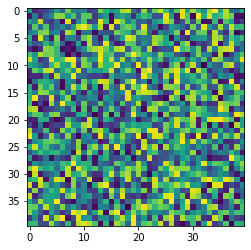

{'slmMode': 'clear', 'task': '/slm_act'}

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Nx=40
Ny=40
image = np.random.randint(0,25555,(Nx,Ny))
startX = 20
startY = 20



ESP32.send_SLM_image(image, startX, startY, timeout=3)

'''
endX = startX+image.shape[0]
endY = startY+image.shape[1]
path = '/slm_act'
payload = {
    "task": path,
    "color": image[:].flatten().tolist(),
    "startX":startX,
    "startY":startY,
    "endX":endX,
    "endY":endY, 
    "slmMode": "image"
}

payload
'''
plt.imshow(image), plt.show()
ESP32.send_SLM_clear()




# Galvos

This is coming soon

# Lasers

This is coming soon

# LEDs

This is coming soon

# PID controller 

Create a feedback loop for constant pressure